In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sales_train_df = pd.read_csv(r"C:\Users\Sarfraz Javed\Downloads\sales_train.csv")
sales_test_df = pd.read_csv(r"C:\Users\Sarfraz Javed\Downloads\test.csv")
item_df = pd.read_csv(r"C:\Users\Sarfraz Javed\Downloads\items.csv")
item_cat_df = pd.read_csv(r"C:\Users\Sarfraz Javed\Downloads\item_categories.csv")
shop_df = pd.read_csv(r"C:\Users\Sarfraz Javed\Downloads\shops.csv")

print("---------------------sales_train_df---------------")
print(sales_train_df.head())
print("--------------sales_test_df------------------")
print(sales_test_df.head())
print("--------------------item_df------------------")
print(item_df.head())
print("-----------------item_cat_df -----------------")
print(item_cat_df.head())
print("--------shop_df--------------")
print(shop_df.head())

---------------------sales_train_df---------------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
--------------sales_test_df------------------
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
--------------------item_df------------------
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***Г

In [3]:
#Merging all the files as  sales_train_df
sales_train_df = sales_train_df.merge(item_df, on='item_id', how='left').merge(shop_df, on= "shop_id", how='left').merge(item_cat_df, on= "item_category_id", how='left')
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


In [4]:
#converting date into date time format
sales_train_df["date"]  = pd.to_datetime(sales_train_df["date"], dayfirst= True)
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства


In [5]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   item_name           object        
 7   item_category_id    int64         
 8   shop_name           object        
 9   item_category_name  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 246.4+ MB


In [6]:
sales_train_df.shape

(2935849, 10)

In [7]:
sales_train_df.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
shop_name             0
item_category_name    0
dtype: int64

In [8]:
sales_train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


In [9]:
#Unique value 
print("No of shops: " + str(sales_train_df["shop_id"].nunique()))
print("No of items: " + str(sales_train_df["item_id"].nunique()))
print("No of items categories: " + str(sales_train_df["item_category_id"].nunique()))

No of shops: 60
No of items: 21807
No of items categories: 84


In [10]:
print("---------------------item_cnt_day-------------------")
print(sales_train_df["item_cnt_day"].value_counts().sort_index(ascending= False))
print("----------------------item_price------------------")
print(sales_train_df["item_price"].value_counts().sort_index(ascending= False))

---------------------item_cnt_day-------------------
 2169.0    1
 1000.0    1
 669.0     1
 637.0     1
 624.0     1
          ..
-5.0       4
-6.0       2
-9.0       1
-16.0      1
-22.0      1
Name: item_cnt_day, Length: 198, dtype: int64
----------------------item_price------------------
 307980.0000       1
 59200.0000        1
 50999.0000        1
 49782.0000        1
 42990.0000        4
                ... 
 0.1000         2932
 0.0900            1
 0.0875            1
 0.0700            2
-1.0000            1
Name: item_price, Length: 19993, dtype: int64


# In item_cnt_day there are negative values: Assuming that on that day there was no sale while there were some products returned.

# In item_price there are negative values as well: This is not possible thus removing that row

In [11]:
sales_train_df[sales_train_df["item_price"]< 0 ]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
484683,2013-05-15,4,32,2973,-1.0,1.0,"DmC Devil May Cry [PS3, русские субтитры]",19,"Москва ТЦ ""Серебряный Дом""",Игры - PS3


In [12]:
# Only taking those rows having item_price > 0 
sales_train_df = sales_train_df[sales_train_df["item_price"]> 0 ]

In [13]:
#Checking
sales_train_df["item_price"].value_counts().sort_index(ascending= False)

307980.0000       1
59200.0000        1
50999.0000        1
49782.0000        1
42990.0000        4
               ... 
0.2000            1
0.1000         2932
0.0900            1
0.0875            1
0.0700            2
Name: item_price, Length: 19992, dtype: int64

In [14]:
#Imputing negative item_cnt_day with 0
sales_train_df.item_cnt_day[sales_train_df.item_cnt_day < 0 ] = 0

In [15]:
#Checking
sales_train_df["item_cnt_day"].value_counts().sort_index(ascending= False)

2169.0          1
1000.0          1
669.0           1
637.0           1
624.0           1
           ...   
4.0         19685
3.0         47350
2.0        194201
1.0       2629371
0.0          7356
Name: item_cnt_day, Length: 190, dtype: int64

In [16]:
sales_train_df.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
2935844,2015-10-10,33,25,7409,299.0,1.0,V/A Nu Jazz Selection (digipack),55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935845,2015-10-09,33,25,7460,299.0,1.0,V/A The Golden Jazz Collection 1 2CD,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935846,2015-10-14,33,25,7459,349.0,1.0,V/A The Best Of The 3 Tenors,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2935847,2015-10-22,33,25,7440,299.0,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,"Москва ТРК ""Атриум""",Музыка - MP3
2935848,2015-10-03,33,25,7460,299.0,1.0,V/A The Golden Jazz Collection 1 2CD,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства


In [17]:
#Extracting Year, Month, Day and  Quarter
sales_train_df["Year"] = pd.to_datetime(sales_train_df["date"]).dt.year
sales_train_df["Month"] = pd.to_datetime(sales_train_df["date"]).dt.month
sales_train_df["Day"] = pd.to_datetime(sales_train_df["date"]).dt.day
sales_train_df["Quarter"] = pd.to_datetime(sales_train_df["date"]).dt.quarter

In [18]:
sales_train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name,Year,Month,Day,Quarter
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,2013,1,2,1
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,2013,1,3,1
2,2013-01-05,0,25,2552,899.00,0.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,2013,1,5,1
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,"Москва ТРК ""Атриум""",Музыка - Винил,2013,1,6,1
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,"Москва ТРК ""Атриум""",Музыка - CD фирменного производства,2013,1,15,1


# EDA

Text(0, 0.5, 'Sales')

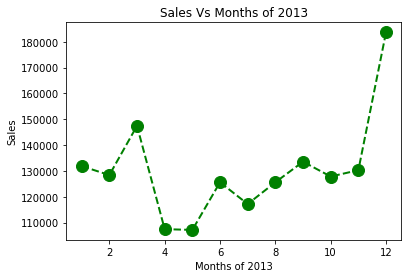

In [19]:
#Sales in Months of 2013
df1 = sales_train_df[sales_train_df["Year"]==2013][["Month","item_cnt_day"]].groupby(["Month"]).sum().reset_index()
plt.plot(df1["Month"], df1["item_cnt_day"], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12 )
plt.title('Sales Vs Months of 2013')
plt.xlabel('Months of 2013')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

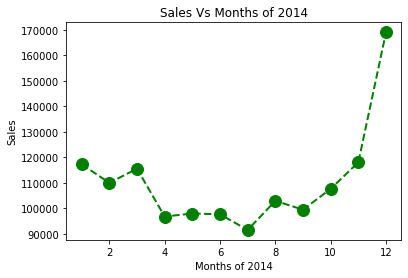

In [20]:
#Sales in Months of 2014
df1 = sales_train_df[sales_train_df["Year"]==2014][["Month","item_cnt_day"]].groupby(["Month"]).sum().reset_index()
plt.plot(df1["Month"], df1["item_cnt_day"], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12 )
plt.title('Sales Vs Months of 2014')
plt.xlabel('Months of 2014')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

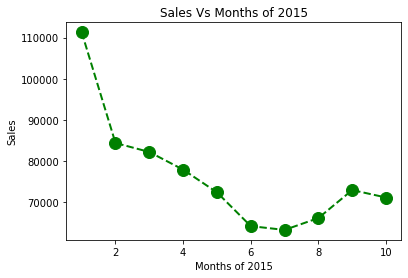

In [21]:
#Sales in Months of 2015
df1 = sales_train_df[sales_train_df["Year"]==2015][["Month","item_cnt_day"]].groupby(["Month"]).sum().reset_index()
plt.plot(df1["Month"], df1["item_cnt_day"], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12 )
plt.title('Sales Vs Months of 2015')
plt.xlabel('Months of 2015')
plt.ylabel('Sales')

# We can see that at the end of 2013 and 2014 there is increase / spike in sales
##This may occur due to year end sale offers or festive season purchase

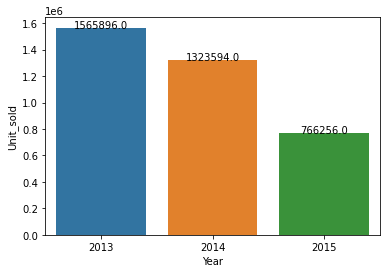

In [22]:
#unit_sold on year
Units_yearly = sales_train_df[["Year", "item_cnt_day"]].groupby(by = ["Year"]).sum().reset_index()
bar = sns.barplot(x="Year", y="item_cnt_day",  data= Units_yearly )
bar.set(xlabel="Year", ylabel = "Unit_sold")
for index, row in Units_yearly.iterrows():
    bar.text(row.name,row.item_cnt_day, round(row.item_cnt_day,2),  color='black', ha="center")


# Units_sold are decreasing Y-O-Y

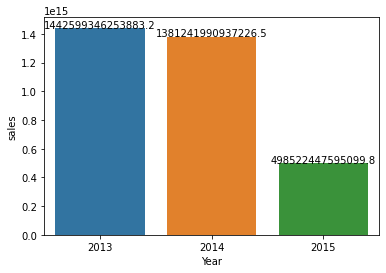

In [23]:
#sale on year
sales_yearly = sales_train_df[["Year", "item_cnt_day", "item_price"]].groupby(by = ["Year"]).sum().reset_index()
sales_yearly["sales"] = sales_yearly["item_cnt_day"]*sales_yearly["item_price"]

bar1 = sns.barplot(x="Year", y="sales",  data= sales_yearly )
bar1.set(xlabel="Year", ylabel = "sales")
for index, row in sales_yearly.iterrows():
    bar1.text(row.name,row.sales, round(row.sales,2),  color='black', ha="center")

# Sales are also falling Y-O-Y

<AxesSubplot:>

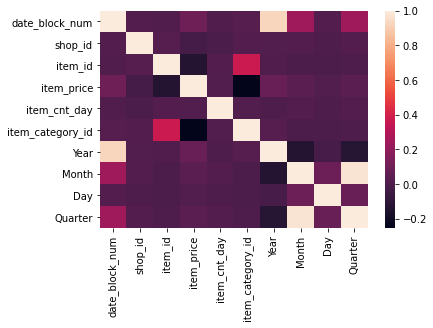

In [26]:
#Checking correlation
sns.heatmap(sales_train_df.corr())

In [27]:
#Cnt on the basis of month, item_id, shop_id
cnt_by_month=sales_train_df.groupby('date_block_num').sum()
cnt_by_month=cnt_by_month.drop(['shop_id', 'item_id', 'item_price', 'item_category_id'], axis=1)
cnt_by_month.reset_index(inplace=True)

cnt_by_item=sales_train_df.groupby('item_id').sum()
cnt_by_item=cnt_by_item.drop(['shop_id', 'date_block_num', 'item_price', 'item_category_id'], axis=1)
cnt_by_item.reset_index(inplace=True)

cnt_by_shop=sales_train_df.groupby('shop_id').sum()
cnt_by_shop=cnt_by_shop.drop(['item_id', 'date_block_num', 'item_price', 'item_category_id'], axis=1)
cnt_by_shop.reset_index(inplace=True)

Text(0.5, 0.98, 'Solds per Shop')

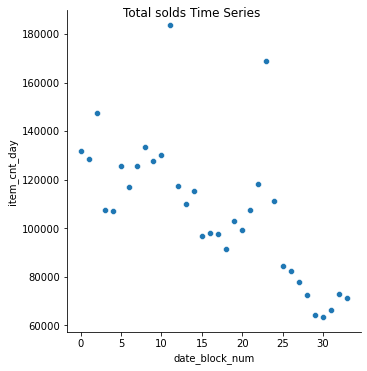

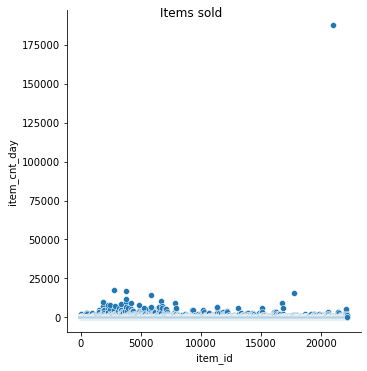

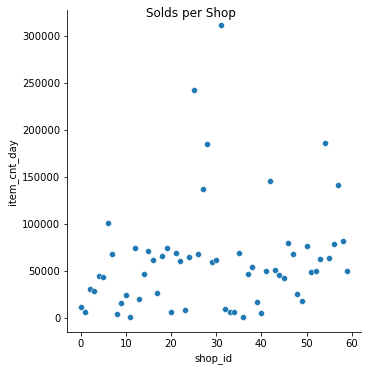

In [28]:
fig1 = sns.relplot(x='date_block_num', y='item_cnt_day', data=cnt_by_month)
fig1a = fig1.fig 
fig1a.suptitle("Total solds Time Series", fontsize=12)


fig2 = sns.relplot(x='item_id', y='item_cnt_day', data=cnt_by_item)
fig2a = fig2.fig 
fig2a.suptitle("Items sold", fontsize=12)


fig3 = sns.relplot(x='shop_id', y='item_cnt_day', data=cnt_by_shop)
fig3a = fig3.fig 
fig3a.suptitle("Solds per Shop", fontsize=12)

In [29]:
print('Best Selling Months:')
date_outlier=[i for i in cnt_by_month['item_cnt_day'] if i > 160000]
date_outlier1=pd.DataFrame({"item_cnt_day": date_outlier})
date_outlier2 = pd.merge(date_outlier1, cnt_by_month, on ='item_cnt_day', how ='inner')
date_outlier2

Best Selling Months:


,item_cnt_day,date_block_num,Year,Month,Day,Quarter
0,183670.0,11,288354198,1718952,2726300,572984
1,169055.0,23,263403004,1569432,2531688,523144


# 11th date_block_num i.e. Dec-2013 and Dec-2014 have the highest sale: Year end sale== Seasonality / Seasonal Outlier

In [36]:
print('Best Selling Items:')
item_outlier=[i for i in cnt_by_item['item_cnt_day'] if i > 150000]
item_outlier1=pd.DataFrame({"item_cnt_day": item_outlier})
item_outlier2 = pd.merge(item_outlier1, cnt_by_item, on ='item_cnt_day', how ='inner')
item_outlier2

Best Selling Items:


,item_cnt_day,item_id,Year,Month,Day,Quarter
0,187660.0,20949,63118215,215996,497331,82492


In [37]:
print('Best Selling Shops:')
shop_outlier=[i for i in cnt_by_shop['item_cnt_day'] if i > 180000]
shop_outlier1=pd.DataFrame({"item_cnt_day": shop_outlier})
shop_outlier2 = pd.merge(shop_outlier1, cnt_by_shop, on ='item_cnt_day', how ='inner')
shop_outlier2

Best Selling Shops:


,item_cnt_day,shop_id,Year,Month,Day,Quarter
0,242237.0,25,374779120,1168799,2982939,451223
1,184777.0,28,286431690,873126,2211475,338875
2,311230.0,31,474525223,1475480,3749349,569968
3,186149.0,54,288907966,851365,2214086,331021


# These are the outlier=== Removing them

In [43]:
sales_train_df1=sales_train_df.copy()
sales_train_df1 = sales_train_df1[(sales_train_df1.date_block_num != 11) & (sales_train_df1.date_block_num != 23)]
sales_train_df1 = sales_train_df1[sales_train_df1.item_id != 20949]
sales_train_df1 = sales_train_df1[(sales_train_df1.shop_id != 25) & (sales_train_df1.shop_id != 28) & (sales_train_df1.shop_id != 31 & (sales_train_df1.shop_id != 54))]
print("----------------Outlier_Removed_df: sales_train_df1-----------------")
sales_train_df1.head()

----------------Outlier_Removed_df: sales_train_df1-----------------


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name,Year,Month,Day,Quarter
0,2013-01-02,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,2013,1,2,1
1880,2013-01-27,0,24,4481,1699.0,1.0,"LittleBigPlanet [PS Vita, русская версия]",22,"Москва ТК ""Буденовский"" (пав.К7)",Игры - PSVita,2013,1,27,1
1881,2013-01-20,0,24,4476,1499.0,1.0,LittleBigPlanet 2 (Platinum) (с поддержкой PS ...,19,"Москва ТК ""Буденовский"" (пав.К7)",Игры - PS3,2013,1,20,1
1882,2013-01-29,0,24,4482,2499.0,1.0,LittleBigPlanet Картинг (с поддержкой PS Move)...,19,"Москва ТК ""Буденовский"" (пав.К7)",Игры - PS3,2013,1,29,1
1883,2013-01-03,0,24,4485,299.5,1.0,"Loco Roco 2 (Essentials) [PSP, русская докумен...",21,"Москва ТК ""Буденовский"" (пав.К7)",Игры - PSP,2013,1,3,1


In [42]:
sales_train.shape

(2329406, 14)

In [44]:
sales_train_df2=sales_train_df1.drop(['date', 'item_name', 'item_category_name', 'shop_name'], axis=1)
sales_train_df2

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,Year,Month,Day,Quarter
0,0,59,22154,999.0,1.0,37,2013,1,2,1
1880,0,24,4481,1699.0,1.0,22,2013,1,27,1
1881,0,24,4476,1499.0,1.0,19,2013,1,20,1
1882,0,24,4482,2499.0,1.0,19,2013,1,29,1
1883,0,24,4485,299.5,1.0,21,2013,1,3,1
...,...,...,...,...,...,...,...,...,...,...
2932306,33,21,7233,599.0,1.0,3,2015,10,31,4
2932307,33,21,7235,298.0,1.0,3,2015,10,2,4
2932308,33,21,7315,399.0,1.0,55,2015,10,4,4
2932309,33,21,7224,4499.0,6.0,20,2015,10,23,4


In [51]:
sales_train_df3=sales_train_df2.copy()
sales_train_df3=sales_train_df3.drop(['item_price', 'item_category_id', "Year","Month","Quarter", "Day"  ], axis=1)
sales_train_df3.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,59,22154,1.0
1880,0,24,4481,1.0
1881,0,24,4476,1.0
1882,0,24,4482,1.0
1883,0,24,4485,1.0


In [52]:
sales_train_df3 = sales_train_df3 .groupby(['date_block_num','shop_id','item_id']).sum()
sales_train_df3 .reset_index(inplace=True)
sales_train_df3.head()

,date_block_num,shop_id,item_id,item_cnt_day
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [53]:
#Scaling item_cnt_day
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
sales_train_df3[['item_cnt_day']] = scale.fit_transform(sales_train_df3[['item_cnt_day']])

In [72]:
sales_train_df4 = sales_train_df3.pivot_table(index=['shop_id','item_id'], columns='date_block_num', values='item_cnt_day', fill_value=0)
sales_train_df4.reset_index(inplace=True)
sales_train_df4.head()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0.000000,4.763579,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.000000,1.470137,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,0.646776,1.305465,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,0.152760,0.152760,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,-0.176584,1.964153,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
sales_train_df5 = sales_train_df3.groupby(['shop_id','item_id']).sum()
sales_train_df5.reset_index(inplace=True)
sales_train_df5.head()

,shop_id,item_id,date_block_num,item_cnt_day
0,0,30,1,4.763579
1,0,31,1,1.470137
2,0,32,1,1.952241
3,0,33,1,0.305520
4,0,35,1,1.787569


In [73]:
sales_train_df4['mean'] = sales_train_df4.iloc[:, 2:].mean(axis=1)
sales_train_df4.head()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,mean
0,0,30,0.000000,4.763579,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148862
1,0,31,0.000000,1.470137,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045942
2,0,32,0.646776,1.305465,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061008
3,0,33,0.152760,0.152760,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009548
4,0,35,-0.176584,1.964153,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055862


# Applying Models

In [85]:
x=sales_train_df4.drop('mean', axis=1)
y=sales_train_df4['mean']

In [86]:
x.head()

date_block_num,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,0,30,0.000000,4.763579,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.000000,1.470137,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,0.646776,1.305465,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,0.152760,0.152760,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,-0.176584,1.964153,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
y.head()

0    0.148862
1    0.045942
2    0.061008
3    0.009548
4    0.055862
Name: mean, dtype: float64

In [88]:
#Train_Test_Split
from sklearn.model_selection import train_test_split
X_train,X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=202)

# 1) Linear Regression Model

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [100]:
lm.score(X_train, y_train)

1.0

In [101]:
y_pred = lm.predict(X_val)

In [102]:
MSE(y_train, lm.predict(X_train))

2.6690596783592525e-25

In [103]:
MSE(y_val, y_pred)

4.571877155041127e-25

In [105]:
MAE(y_val, y_pred)

1.449488936159452e-13

# Prediction

In [162]:
y_pred_test=lm.predict(sales_test_df2)

In [163]:
#Reverse scaling
y_pred_inverse = scale.inverse_transform(y_pred_test)

In [164]:
y_pred2=pd.DataFrame(y_pred_inverse, columns=['item_cnt_month'])
y_pred2

,item_cnt_month
0,1.898004
1,2.072338
2,2.061035
3,2.038827
4,2.072338
...,...
214195,1.969546
214196,2.072338
214197,1.902525
214198,2.072338


In [165]:
submission=pd.concat([sales_test_df['ID'], y_pred2], axis=1)
submission

,ID,item_cnt_month
0,0,1.898004
1,1,2.072338
2,2,2.061035
3,3,2.038827
4,4,2.072338
...,...,...
214195,214195,1.969546
214196,214196,2.072338
214197,214197,1.902525
214198,214198,2.072338


# Since MSE and MAE is quite low our model is performing good for val set

# 2) Random Forest Regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators= 8)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=8)

In [111]:
rfr.score(X_train,y_train)

0.9568522421365885

In [112]:
rfr.score(X_val,y_val)

0.7150449556566217

In [113]:
y_pred = rfr.predict(X_val)

In [114]:
MSE(y_val, y_pred)

0.006487572836307965

In [115]:
MAE(y_val, y_pred)

0.003699637722620489

# Since MSE and MAE are low thus our model is performing well.
## We could have applied hyper parameter tuning but that would be computionally very expensive. Thus not done now

# Prediction

In [154]:
sales_test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [155]:
sales_test_df1=sales_test_df.merge(x, how="left", on = ['shop_id', 'item_id'])
sales_test_df1.head()

,ID,shop_id,item_id,0,1,2,3,4,5,6,...,24,25,26,27,28,29,30,31,32,33
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.011912,0.0,0.0,0.0,-0.176584,-0.176584,-0.176584,0.152760,-0.176584,0.000000
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.152760,-0.011912,0.000000,-0.176584,0.152760,-0.176584
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.176584,0.000000,0.000000
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
sales_test_df2=sales_test_df1.copy()
sales_test_df2=sales_test_df2.fillna(0)
sales_test_df2=sales_test_df2.drop('ID', axis=1)
sales_test_df2.head()

,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.011912,0.0,0.0,0.0,-0.176584,-0.176584,-0.176584,0.152760,-0.176584,0.000000
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.152760,-0.011912,0.000000,-0.176584,0.152760,-0.176584
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-0.176584,0.000000,0.000000
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [158]:
y_pred_test=rfr.predict(sales_test_df2)

In [159]:
#Reverse scaling
y_pred_inverse = scale.inverse_transform(y_pred_test)

In [160]:
y_pred2=pd.DataFrame(y_pred_inverse, columns=['item_cnt_month'])
y_pred2

,item_cnt_month
0,1.907794
1,2.070077
2,2.057694
3,2.038827
4,2.070077
...,...
214195,1.971241
214196,2.070077
214197,1.907279
214198,2.070077


In [161]:
submission=pd.concat([sales_test_df['ID'], y_pred2], axis=1)
submission

,ID,item_cnt_month
0,0,1.907794
1,1,2.070077
2,2,2.057694
3,3,2.038827
4,4,2.070077
...,...,...
214195,214195,1.971241
214196,214196,2.070077
214197,214197,1.907279
214198,214198,2.070077


# Time Series Analysis

In [140]:
sales_train_df1.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name,Year,Month,Day,Quarter
0,2013-01-02,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,2013,1,2,1
1880,2013-01-27,0,24,4481,1699.0,1.0,"LittleBigPlanet [PS Vita, русская версия]",22,"Москва ТК ""Буденовский"" (пав.К7)",Игры - PSVita,2013,1,27,1
1881,2013-01-20,0,24,4476,1499.0,1.0,LittleBigPlanet 2 (Platinum) (с поддержкой PS ...,19,"Москва ТК ""Буденовский"" (пав.К7)",Игры - PS3,2013,1,20,1
1882,2013-01-29,0,24,4482,2499.0,1.0,LittleBigPlanet Картинг (с поддержкой PS Move)...,19,"Москва ТК ""Буденовский"" (пав.К7)",Игры - PS3,2013,1,29,1
1883,2013-01-03,0,24,4485,299.5,1.0,"Loco Roco 2 (Essentials) [PSP, русская докумен...",21,"Москва ТК ""Буденовский"" (пав.К7)",Игры - PSP,2013,1,3,1


In [141]:
sales_ts = sales_train_df1.iloc[:, 0:6]
sales_ts .reset_index(inplace=True, drop = True)
sales_ts.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-27,0,24,4481,1699.0,1.0
2,2013-01-20,0,24,4476,1499.0,1.0
3,2013-01-29,0,24,4482,2499.0,1.0
4,2013-01-03,0,24,4485,299.5,1.0


In [148]:
sales_ts["Revenue"] = sales_ts["item_price"] * sales_ts["item_cnt_day"]
sales_ts.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,sales,Revenue
0,2013-01-02,0,59,22154,999.0,1.0,999.0,999.0
1,2013-01-27,0,24,4481,1699.0,1.0,1699.0,1699.0
2,2013-01-20,0,24,4476,1499.0,1.0,1499.0,1499.0
3,2013-01-29,0,24,4482,2499.0,1.0,2499.0,2499.0
4,2013-01-03,0,24,4485,299.5,1.0,299.5,299.5


In [150]:
monthly_revenue = sales_ts.groupby(['date_block_num'])['Revenue'].sum()
monthly_revenue.head()

date_block_num
0    80728424.72
1    79994451.86
2    94008840.90
3    61543980.90
4    57882562.91
Name: Revenue, dtype: float64

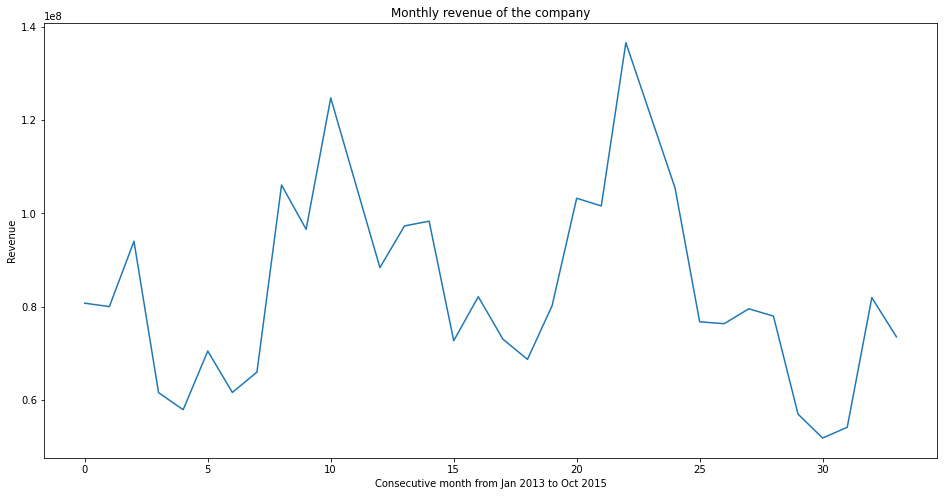

In [151]:
plt.figure(figsize=(16,8))
plt.plot(monthly_revenue)
plt.title("Monthly revenue of the company")
plt.xlabel("Consecutive month from Jan 2013 to Oct 2015")
plt.ylabel("Revenue")
plt.show()